## 1. Install and Import Dependencies

In [1]:
!pip install torch==1.10.2+cu113 torchvision==0.11.3+cu113 torchaudio===0.10.2+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
     ---------------------------------------- 2.4/2.4 GB 871.0 kB/s eta 0:00:00
     ---------------------------------------- 3.1/3.1 MB 28.8 MB/s eta 0:00:00
     ------------------------------------- 336.6/336.6 KB 20.4 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.10.2
    Uninstalling torch-1.10.2:
      Successfully uninstalled torch-1.10.2
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.3
    Uninstalling torchvision-0.11.3:
      Successfully uninstalled torchvision-0.11.3
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.10.2
    Uninstalling torchaudio-0.10.2:
      Successfully uninstalled torchaudio-0.10.2


DEPRECATION: The HTML index page being used (https://download.pytorch.org/whl/cu113/torch_stable.html) is not a proper HTML 5 document. This is in violation of PEP 503 which requires these pages to be well-formed HTML 5 documents. Please reach out to the owners of this index page, and ask them to update this index page to a valid HTML 5 document. pip 22.2 will enforce this behaviour change. Discussion can be found at https://github.com/pypa/pip/issues/10825


In [56]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

## 2. Cloning the Ultralytics YOLOv5 repository 

In [1]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
# Enter the directory and installing the requirements depdencies of YOLOv5
!cd yolov5 & pip install -r requirements.txt

## 3. Load the Model of Yolo V5 

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\dotsc_amuhammad/.cache\torch\hub\master.zip
YOLOv5  2022-2-1 torch 1.10.2+cu113 CUDA:0 (Quadro P620, 2048MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

## 4. Initial Testing Using the Pre-trained (on COCO labels) Model by Making Detections on Images from the Internet

In [6]:
# Images
imgs = ['https://ultralytics.com/images/zidane.jpg']  # batch of images

# Inference
results = model(imgs)

In [7]:
results.print()

image 1/1: 720x1280 2 persons, 1 tie
Speed: 648.6ms pre-process, 37.8ms inference, 31.2ms NMS per image at shape (1, 3, 384, 640)


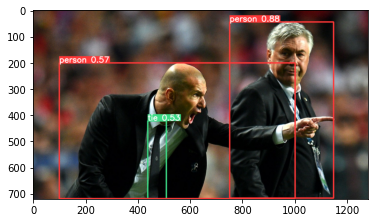

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

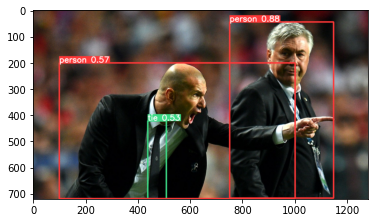

In [9]:
plt.imshow(np.squeeze(results.render()))

In [16]:
# Doing another testing detection using a different image
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [17]:
# Make sure we got it right
img

'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [18]:
results = model(img)
results.print()

image 1/1: 533x800 34 cars, 5 trucks, 1 sheep
Speed: 200.1ms pre-process, 37.8ms inference, 0.0ms NMS per image at shape (1, 3, 448, 640)


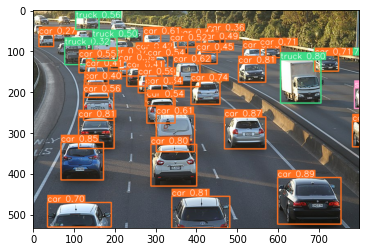

In [19]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

## 5. Initial Testing on Pre-Recorded Videos but this time on Real-Time Detections 

In [21]:
cap = cv2.VideoCapture("3 mins.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections
    resuts = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF ==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

## 6. Creating New Custom Images to be used later to Custom (Fine-Tune) Train the Model  

In [43]:
import uuid # to create a unique identifier to name impages
import os   # to work with files
import time # to make break while detecting

In [37]:
IMAGES_PATH = os.path.join('data', 'images') # it is soing to be /data/images under current directory
labels = ['awake', 'drowsy'] # Define the new two lablels 
number_imgs = 20 # Number of new images to be labeled

In [38]:
cap = cv2.VideoCapture(0) #"0" is the first intalled webcam on the computer
# Loop through lables
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(10)
    
    # Loop through image range
    for img_num in range (number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        #Webcam feed
        ret, frame = cap.read()
        
        #create a name of each image
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Write out the captured images to a file
        cv2.imwrite(imgname, frame)
        
        # Show (render) the images to the screen
        cv2.imshow('Image Collection', frame)
        
        # some delay between capturing new pictures
        time.sleep(3)
        
        
        # Gracefully stop the webacam
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

#close the webcam gracefully
cap.release()
cv2.destroyAllWindows()        
        

## 7. Label the New Images Using the LabelImg App

In [26]:
# Here, I have used the LabelImg app to do the manual labeling
# There are other options for labeling such as https://www.youtube.com/watch?v=x0ThXHbtqCQ 
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [27]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

## 8. Fine-Tuning the Model on Custom Labels/Classes

In [30]:
# Training the model with using 5 to epochs to make sure everying is working
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 5 --data dataset.yml --weights yolov5s.pt

github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch.yaml, epochs=5, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2022-1-31 torch 1.10.2+cu113 CUDA:0 (Quadro P620, 2048MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.

In [31]:
# Actually custom training with epochs =500. Depending on the computer to determing how much time it's going to take!
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt

github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2022-1-31 torch 1.10.2+cu113 CUDA:0 (Quadro P620, 2048MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=

    59/499     1.06G   0.04818   0.01467   0.02974        38       320:  33%|###3      | 1/3 [00:01<00:01,  1.70it/s]
    59/499     1.06G   0.04818   0.01467   0.02974        38       320:  67%|######6   | 2/3 [00:01<00:00,  1.67it/s]
    59/499     1.06G   0.05321   0.01467    0.0288        14       320:  67%|######6   | 2/3 [00:01<00:00,  1.67it/s]
    59/499     1.06G   0.05321   0.01467    0.0288        14       320: 100%|##########| 3/3 [00:01<00:00,  2.14it/s]
    59/499     1.06G   0.05321   0.01467    0.0288        14       320: 100%|##########| 3/3 [00:01<00:00,  2.00it/s]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:00<00:00,  2.85it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:00<00:00,  4.61it/s]
               

   184/499     1.06G   0.04563   0.01066   0.01468        36       320:   0%|          | 0/3 [00:00<?, ?it/s]
   184/499     1.06G   0.04563   0.01066   0.01468        36       320:  33%|###3      | 1/3 [00:00<00:01,  1.69it/s]
   184/499     1.06G    0.0432   0.01019   0.01287        32       320:  33%|###3      | 1/3 [00:01<00:01,  1.69it/s]
   184/499     1.06G    0.0432   0.01019   0.01287        32       320:  67%|######6   | 2/3 [00:01<00:00,  1.70it/s]
   184/499     1.06G   0.04435   0.01044   0.01076        14       320:  67%|######6   | 2/3 [00:01<00:00,  1.70it/s]
   184/499     1.06G   0.04435   0.01044   0.01076        14       320: 100%|##########| 3/3 [00:01<00:00,  2.13it/s]
   184/499     1.06G   0.04435   0.01044   0.01076        14       320: 100%|##########| 3/3 [00:01<00:00,  1.99it/s]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P  

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:00<00:00,  2.91it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:00<00:00,  4.71it/s]
                 all         38         38      0.821      0.956      0.942      0.583

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
   247/499     1.06G   0.03616  0.009258   0.01365        37       320:   0%|          | 0/3 [00:00<?, ?it/s]
   247/499     1.06G   0.03616  0.009258   0.01365        37       320:  33%|###3      | 1/3 [00:00<00:01,  1.68it/s]
   247/499     1.06G   0.03732  0.009595   0.01048        40       320:  33%|###3      | 1/3 [00:01<00:01,  1.68it/s]
   247/499     1.06G   0.03732  0.009595   0.01048        40  

                 all         38         38      0.998          1      0.995      0.861

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
   403/499     1.06G   0.01939  0.006931  0.009255        38       320:   0%|          | 0/3 [00:00<?, ?it/s]
   403/499     1.06G   0.01939  0.006931  0.009255        38       320:  33%|###3      | 1/3 [00:00<00:01,  1.64it/s]
   403/499     1.06G   0.02171  0.007561  0.008164        39       320:  33%|###3      | 1/3 [00:01<00:01,  1.64it/s]
   403/499     1.06G   0.02171  0.007561  0.008164        39       320:  67%|######6   | 2/3 [00:01<00:00,  1.68it/s]
   403/499     1.06G   0.02033  0.006843  0.006641        10       320:  67%|######6   | 2/3 [00:01<00:00,  1.68it/s]
   403/499     1.06G   0.02033  0.006843  0.006641        10       320: 100%|##########| 3/3 [00:01<00:00,  2.16it/s]
   403/499     1.06G   0.02033  0.006843  0.006641        10       320: 100%|##########| 3/3 [00:01<00

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:00<00:00,  2.98it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:00<00:00,  4.81it/s]
                 all         38         38      0.998          1      0.995      0.929

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
   447/499     1.06G   0.02126  0.006868  0.005561        34       320:   0%|          | 0/3 [00:00<?, ?it/s]
   447/499     1.06G   0.02126  0.006868  0.005561        34       320:  33%|###3      | 1/3 [00:00<00:01,  1.65it/s]
   447/499     1.06G   0.01784  0.006257  0.003838        34       320:  33%|###3      | 1/3 [00:01<00:01,  1.65it/s]
   447/499     1.06G   0.01784  0.006257  0.003838        34       320:  67%|######6   | 2/3 [00:01<00:00,  1.68it/s]
   447/499     1.06G   0.01742  0.005612  0.003562        11       320

In [32]:
# more training 
# Takes some time
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 8000 --data dataset.yml --weights yolov5s.pt

github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch.yaml, epochs=8000, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2022-1-31 torch 1.10.2+cu113 CUDA:0 (Quadro P620, 2048MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup

In [33]:
# more training 
# Takes some time
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 20000 --data dataset.yml --weights yolov5s.pt


   59/7999     1.06G   0.04438   0.01483   0.02954        38       320:  33%|###3      | 1/3 [00:01<00:01,  1.71it/s]
   59/7999     1.06G   0.04438   0.01483   0.02954        38       320:  67%|######6   | 2/3 [00:01<00:00,  1.68it/s]
   59/7999     1.06G   0.05302   0.01459    0.0289        14       320:  67%|######6   | 2/3 [00:01<00:00,  1.68it/s]
   59/7999     1.06G   0.05302   0.01459    0.0289        14       320: 100%|##########| 3/3 [00:01<00:00,  2.15it/s]
   59/7999     1.06G   0.05302   0.01459    0.0289        14       320: 100%|##########| 3/3 [00:01<00:00,  2.00it/s]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:00<00:00,  2.89it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:00<00:00,  4.71it/s]
              

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
  191/7999     1.06G   0.03957   0.01054  0.009616        35       320:   0%|          | 0/3 [00:00<?, ?it/s]
  191/7999     1.06G   0.03957   0.01054  0.009616        35       320:  33%|###3      | 1/3 [00:00<00:01,  1.69it/s]
  191/7999     1.06G    0.0411   0.01087  0.009426        37       320:  33%|###3      | 1/3 [00:01<00:01,  1.69it/s]
  191/7999     1.06G    0.0411   0.01087  0.009426        37       320:  67%|######6   | 2/3 [00:01<00:00,  1.70it/s]
  191/7999     1.06G   0.03908   0.01037  0.008282        14       320:  67%|######6   | 2/3 [00:01<00:00,  1.70it/s]
  191/7999     1.06G   0.03908   0.01037  0.008282        14       320: 100%|##########| 3/3 [00:01<00:00,  2.14it/s]
  191/7999     1.06G   0.03908   0.01037  0.008282        14       320: 100%|##########| 3/3 [00:01<00:00,  2.00it/s]

               Class     Images     Labels          P          R     mA

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:00<00:00,  2.95it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:00<00:00,  4.77it/s]
                 all         38         38      0.949      0.964      0.989      0.774

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
  247/7999     1.06G   0.03274  0.008996   0.01453        37       320:   0%|          | 0/3 [00:00<?, ?it/s]
  247/7999     1.06G   0.03274  0.008996   0.01453        37       320:  33%|###3      | 1/3 [00:00<00:01,  1.70it/s]
  247/7999     1.06G   0.03418  0.009512    0.0121        40       320:  33%|###3      | 1/3 [00:01<00:01,  1.70it/s]
  247/7999     1.06G   0.03418  0.009512    0.0121        40  

github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch.yaml, epochs=20000, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2022-1-31 torch 1.10.2+cu113 CUDA:0 (Quadro P620, 2048MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixu


Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'



               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:00<00:00,  2.91it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:00<00:00,  4.67it/s]
                 all         38         38    0.00561      0.269    0.00378   0.000738

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
   5/19999     1.05G    0.1017    0.0169   0.07791        31       320:   0%|          | 0/3 [00:00<?, ?it/s]
   5/19999     1.05G    0.1017    0.0169   0.07791        31       320:  33%|###3      | 1/3 [00:00<00:01,  1.64it/s]
   5/19999     1.05G    0.1017   0.01645   0.07718        26       320:  33%|###3      | 1/3 [00:01<00:01,  1.64it/s]
   5/19999     1.05G    0.1017   0.01645   0.07718        26 

  59/19999     1.06G   0.05993    0.0131   0.02851        30       320:  33%|###3      | 1/3 [00:00<00:01,  1.70it/s]
  59/19999     1.06G   0.05792   0.01426   0.02927        38       320:  33%|###3      | 1/3 [00:01<00:01,  1.70it/s]
  59/19999     1.06G   0.05792   0.01426   0.02927        38       320:  67%|######6   | 2/3 [00:01<00:00,  1.67it/s]
  59/19999     1.06G   0.05991   0.01427   0.02837        14       320:  67%|######6   | 2/3 [00:01<00:00,  1.67it/s]
  59/19999     1.06G   0.05991   0.01427   0.02837        14       320: 100%|##########| 3/3 [00:01<00:00,  2.15it/s]
  59/19999     1.06G   0.05991   0.01427   0.02837        14       320: 100%|##########| 3/3 [00:01<00:00,  2.00it/s]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:00<00:00,  2.91it/s]
               Class     Images

 215/19999     1.06G   0.04854   0.01052  0.009263         9       320: 100%|##########| 3/3 [00:01<00:00,  2.13it/s]
 215/19999     1.06G   0.04854   0.01052  0.009263         9       320: 100%|##########| 3/3 [00:01<00:00,  1.99it/s]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:00<00:00,  2.93it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:00<00:00,  4.74it/s]
                 all         38         38          1      0.977      0.995      0.675

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
 216/19999     1.06G   0.04867  0.009269  0.008106        36       320:   0%|          | 0/3 [00:00<?, ?it/s]
 216/19999     1.06G   0.04867  0.009269  0.008106        36 

 258/19999     1.06G    0.0326   0.01108   0.01312        20       320: 100%|##########| 3/3 [00:01<00:00,  2.13it/s]
 258/19999     1.06G    0.0326   0.01108   0.01312        20       320: 100%|##########| 3/3 [00:01<00:00,  1.99it/s]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:00<00:00,  2.98it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:00<00:00,  4.81it/s]
                 all         38         38       0.76          1      0.981       0.56

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
 259/19999     1.06G    0.0367  0.009724  0.005977        36       320:   0%|          | 0/3 [00:00<?, ?it/s]
 259/19999     1.06G    0.0367  0.009724  0.005977        36 

 465/19999     1.06G   0.02976  0.008866   0.00786        16       320:  67%|######6   | 2/3 [00:01<00:00,  1.70it/s]
 465/19999     1.06G   0.02976  0.008866   0.00786        16       320: 100%|##########| 3/3 [00:01<00:00,  2.05it/s]
 465/19999     1.06G   0.02976  0.008866   0.00786        16       320: 100%|##########| 3/3 [00:01<00:00,  1.94it/s]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:00<00:00,  2.97it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:00<00:00,  4.79it/s]
                 all         38         38      0.988      0.972       0.99      0.817

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
 466/19999     1.06G   0.02792  0.006642  0.008177   


               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:00<00:00,  2.98it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:00<00:00,  4.81it/s]
                 all         38         38      0.999          1      0.995      0.833

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
 497/19999     1.06G   0.02648   0.00921  0.005039        41       320:   0%|          | 0/3 [00:00<?, ?it/s]
 497/19999     1.06G   0.02648   0.00921  0.005039        41       320:  33%|###3      | 1/3 [00:00<00:01,  1.70it/s]
 497/19999     1.06G   0.02565  0.008864  0.004916        42       320:  33%|###3      | 1/3 [00:01<00:01,  1.70it/s]
 497/19999     1.06G   0.02565  0.008864  0.004916        42 

## 9. Load the trained ‘Drowsiness” Model 

In [41]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp6/weights/last.pt')

Using cache found in C:\Users\dotsc_amuhammad/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-2-2 torch 1.10.2+cu113 CUDA:0 (Quadro P620, 2048MiB)

Fusing layers... 
Model Summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


## 10. Perform Drowsiness Detection on A Single Image

In [72]:
img = os.path.join('data', 'images', 'awake.0491fc68-82d2-11ec-ab96-b8ca3a882b39.jpg')
results = model(img)
results.print()

image 1/1: 480x640 2 awakes
Speed: 6.0ms pre-process, 26.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


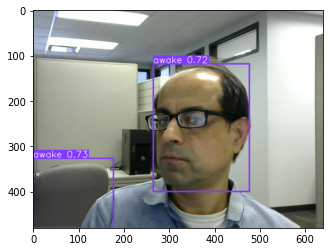

In [73]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## 11. Perform Drowsiness Detection on Real-Time Video

In [75]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame= cap.read()
    
    # Make detection 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()